In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

from models.MuseGAN import MuseGAN
from utils.loaders import load_music

from music21 import midi, note, stream, duration

import tensorflow as tf
tf.compat.v1.experimental.output_all_intermediates(True)

En la siguiente sección vamos a crear los directorios que nuestro modelo va a necesitar, elegimos una ruta y dentro de ella se crearan por ahora 4 directorios donde se van a guardar los datos que vamos a extaer de nuestros archivos con formato  **.midi** que hemos guardado con anterioridad en la carpeta **chorales**.

In [2]:
# run params
SECTION = 'classical_gan'
DATA_NAME = 'classical'
FILENAME = 'Jsb16thSeparated.npz'

directory = os.getcwd()
RUN_FOLDER = os.path.join(directory,"output",SECTION)

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights'))
    os.makedirs(os.path.join(RUN_FOLDER, 'samples'))

mode =  'build' # ' 'load' #

Primero necesitamos obtener los datos para alimentar el GAN.
Vamos a transofrmar la data cruda a datos que pueda entender nuestra GAN. 

Cada compas consta de 16 pasos de tiempo y hay un potencial de 84 tonos en las 4 pistas, todo esto en términos musicales. Pero necesitamos otro formato de los datos.

Dicha transformación la vamos a lograr con la función load_music, que genera una representación matricial de las notas musicales en función de los parametros: compas, tiempo, ritmo y pista.

Gracias a la función load_music vamos a tener acceso a el valor **data_ints** que contiene específicamente la representación que buscamos de las notas musicales para alimentar nuestro GAN

**data_binary** el tensor de entrada para nuestra red neuronal

In [6]:
BATCH_SIZE = 64
n_bars = 2
n_steps_per_bar = 16
n_pitches = 84
n_tracks = 4

data_binary, data_ints, raw_data = load_music(DATA_NAME, FILENAME, n_bars, n_steps_per_bar)
data_binary = np.squeeze(data_binary)

En la implementación de MuseGAN podemos ver  que el generador no solo acepta un solo vector de ruido como entrada, sino que tiene cuatro entradas separadas, que corresponden a las cuatro secciones de la orquesta : acordes, estilo, melodía y ritmo.

Para generar un compas en particular para una pista, los vectores de los acordes, estilo, melodía y ritmo de la red se concatenan para formar un vector más largo.

In [7]:
gan = MuseGAN(input_dim = data_binary.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = BATCH_SIZE
        , n_tracks = n_tracks
        , n_bars = n_bars
        , n_steps_per_bar = n_steps_per_bar
        , n_pitches = n_pitches
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:                 
    gan.load_weights(RUN_FOLDER)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\richi1325\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


Lo que vemos a continuación es un resumen de la arquitectura del modelo de red neuronal temporal implementado para la entrada de acordes.

In [8]:
#gan.chords_tempNetwork.summary()

Lo que vemos a continuación es un resumen de la arquitectura del modelo de red neuronal de generación de compases para cada pista.

In [ ]:
#gan.barGen[0].summary()

In [9]:
#gan.generator.summary()

In [ ]:
#gan.critic.summary()

In [5]:
#gan.plot_model(RUN_FOLDER)

In [10]:
EPOCHS = 3500
PRINT_EVERY_N_BATCHES = 10

gan.epoch = 0

Ya definidas las épocas el y los parametros del modelo procedemos a enternarlo

In [7]:
gan.train(     
   data_binary
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

2021-11-04 09:45:09.744149: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-04 09:45:11.816679: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1996185000 Hz


0 (5, 1) [D loss: (9.2)(R -0.7, F -0.0, G 1.0)] [G loss: -0.4]


/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1 (5, 1) [D loss: (-252.1)(R -298.0, F -4.8, G 5.1)] [G loss: -26.4]
2 (5, 1) [D loss: (-238.2)(R -276.9, F -4.1, G 4.3)] [G loss: -125.4]
3 (5, 1) [D loss: (-330.7)(R -516.0, F -1.2, G 18.7)] [G loss: -240.6]
4 (5, 1) [D loss: (-322.5)(R -502.1, F -31.8, G 21.1)] [G loss: -289.0]
5 (5, 1) [D loss: (-296.1)(R -352.3, F -82.8, G 13.9)] [G loss: -712.7]
6 (5, 1) [D loss: (-81.2)(R -136.3, F 55.1, G 0.0)] [G loss: -169.4]
7 (5, 1) [D loss: (-169.0)(R -715.5, F 355.0, G 19.1)] [G loss: -576.4]
8 (5, 1) [D loss: (-117.6)(R -483.1, F 299.9, G 6.6)] [G loss: -546.7]
9 (5, 1) [D loss: (-63.4)(R -338.9, F 254.2, G 2.1)] [G loss: -418.7]
10 (5, 1) [D loss: (-25.7)(R -229.2, F 199.1, G 0.4)] [G loss: -281.2]
11 (5, 1) [D loss: (-6.6)(R -145.2, F 138.5, G 0.0)] [G loss: -172.7]
12 (5, 1) [D loss: (-0.5)(R -74.1, F 73.1, G 0.0)] [G loss: -73.8]
13 (5, 1) [D loss: (-13.8)(R 52.8, F -68.4, G 0.2)] [G loss: 117.9]
14 (5, 1) [D loss: (-95.1)(R 460.1, F -634.4, G 7.9)] [G loss: 219.2]
15 (5, 1) [D loss:

KeyboardInterrupt: 

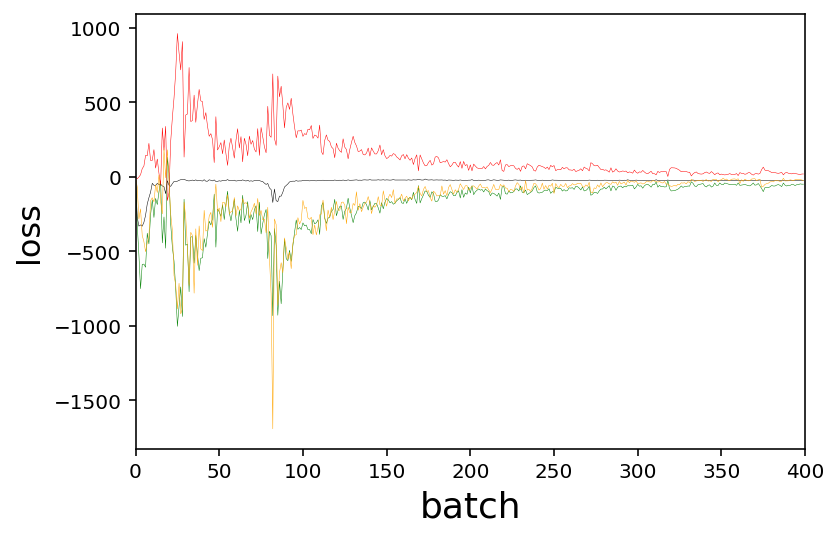

In [21]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan.d_losses))
# plt.ylim(0, 2)

plt.show()